In [1]:
%matplotlib inline

In [2]:
import fastcat as fc
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Get attenuation coefficient for Bismuth

mu_bi=fc.get_mu(z=83)
# Get attenuation coefficient for Gadolinium
mu_gd=fc.get_mu(z=64)

energies = np.linspace(10, 500, 5000)

mu_bismuth = [mu_bi(energy) for energy in energies]
mu_gadolinium = [mu_gd(energy) for energy in energies]

# Add the k-edge energies to the plot
k_bi = 90.5
k_gd = 50.2

In [17]:
# Filter with a 1d normal filter with a 5 keV energy resolution
from scipy.ndimage import gaussian_filter1d

# # Filter with a 1d Gaussian filter with a 5 keV energy resolution
# mu_bismuth = gaussian_filter1d(mu_bismuth, sigma=20)
# mu_gadolinium = gaussian_filter1d(mu_gadolinium, sigma=20)

In [18]:
import spekpy as sp

In [19]:
s = sp.Spek(120,14)
s.filter('Al',4)

s2 = sp.Spek(140,14)
s2.filter('Al',4)

xx, yy = s.get_spectrum()
xx2, yy2 = s2.get_spectrum()

Fluence between W and Bi k-edges (120 kVp, 1 mm Cu, 0.89 mm Bi): 0.08
Fluence between W and Bi k-edges (140 kVp, 1 mm Cu, 0.89 mm Bi): 0.86
Fluence above Bi k-edge (120 kVp, 1 mm Cu, 0.89 mm Bi): 0.04
Fluence above Bi k-edge (140 kVp, 1 mm Cu, 0.89 mm Bi): 0.94
Mean energy between W and Bi k-edges (120 kVp, 1 mm Cu, 0.89 mm Bi): 85.95 keV
Mean energy between W and Bi k-edges (140 kVp, 1 mm Cu, 0.89 mm Bi): 81.98 keV
Mean energy above Bi k-edge (120 kVp, 1 mm Cu, 0.89 mm Bi): 91.30 keV
Mean energy above Bi k-edge (140 kVp, 1 mm Cu, 0.89 mm Bi): 94.24 keV


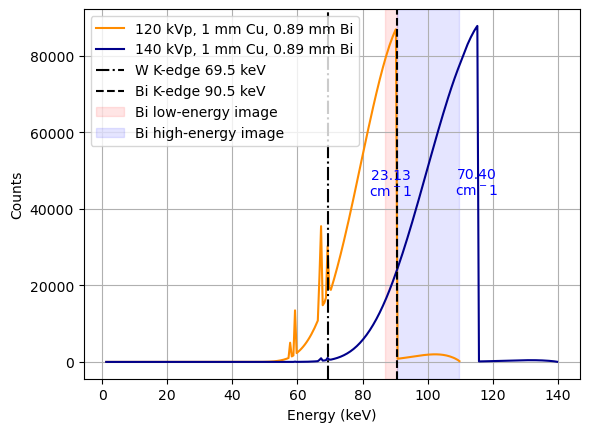

In [49]:
s_low = sp.Spek(110,14)
s_low.filter('Al',4)
s_low.filter('Bi',0.89)
s_low.filter('Cu',2)

xx_low, yy_low = s_low.get_spectrum()

s_high = sp.Spek(140,14)
s_high.filter('Al',4)
# s_high.filter('Bi',0.89)
s_high.filter('U',1)

xx_high, yy_high = s_high.get_spectrum()


k_20 = 20
k_W = 87
k_top = 93 #115.6

# Find the closes xx and xx2 values to the k-edge energies
k_bi_index_high = np.argmin(np.abs(xx_high - k_bi))
k_bi_index_low = np.argmin(np.abs(xx_low - k_bi))
k_W_index_high = np.argmin(np.abs(xx_high - 80))
k_W_index_low = np.argmin(np.abs(xx_low - 69.5))
k_top_index_high = np.argmin(np.abs(xx_high - k_top))
k_top_index_low = np.argmin(np.abs(xx_low - k_top))

k_20_index_low = np.argmin(np.abs(xx_low - 20))
k_20_index_high = np.argmin(np.abs(xx_high - 20))

# Calculate the percent of the fluence between the k-edges 

fluence_W_to_bi_high = np.sum(yy_high[k_W_index_high:k_bi_index_high]) / np.sum(yy_high)
fluence_W_to_bi_low = np.sum(yy_low[k_W_index_low:k_bi_index_low]) / np.sum(yy_low)
fluence_bi_high = np.sum(yy_high[k_bi_index_high:k_top_index_high]) / np.sum(yy_high)
fluence_bi_low = np.sum(yy_low[:k_bi_index_low]) / np.sum(yy_low)

# Find the mean energy in each num_regions
mean_energy_high = np.mean(xx_high*(yy_high/np.sum(yy_high)))
mean_energy_low = np.mean(xx_low*(yy_low/np.sum(yy_low)))

# Calculate the mean energy in each num_regions as a weighted average of the energy time the fluence in each bin

mean_energy_W_to_bi_high = np.sum(xx_high[k_W_index_high:k_bi_index_high]*(yy_high[k_W_index_high:k_bi_index_high]/np.sum(yy_high[k_W_index_high:k_bi_index_high])))
mean_energy_W_to_bi_low = np.sum(xx_low[k_W_index_low:k_bi_index_low]*(yy_low[k_W_index_low:k_bi_index_low]/np.sum(yy_low[k_W_index_low:k_bi_index_low])))
mean_energy_bi_high = np.sum(xx_high[k_bi_index_high:k_top_index_high]*(yy_high[k_bi_index_high:k_top_index_high]/np.sum(yy_high[k_bi_index_high:k_top_index_high])))
mean_energy_bi_low = np.sum(xx_low[k_bi_index_low:]*(yy_low[k_bi_index_low:]/np.sum(yy_low[k_bi_index_low:])))
print(f'Fluence between W and Bi k-edges (120 kVp, 1 mm Cu, 0.89 mm Bi): {fluence_W_to_bi_high:.2f}')
print(f'Fluence between W and Bi k-edges (140 kVp, 1 mm Cu, 0.89 mm Bi): {fluence_W_to_bi_low:.2f}')
print(f'Fluence above Bi k-edge (120 kVp, 1 mm Cu, 0.89 mm Bi): {fluence_bi_high:.2f}')
print(f'Fluence above Bi k-edge (140 kVp, 1 mm Cu, 0.89 mm Bi): {fluence_bi_low:.2f}')
print(f'Mean energy between W and Bi k-edges (120 kVp, 1 mm Cu, 0.89 mm Bi): {mean_energy_W_to_bi_high:.2f} keV')
print(f'Mean energy between W and Bi k-edges (140 kVp, 1 mm Cu, 0.89 mm Bi): {mean_energy_W_to_bi_low:.2f} keV')
print(f'Mean energy above Bi k-edge (120 kVp, 1 mm Cu, 0.89 mm Bi): {mean_energy_bi_high:.2f} keV')
print(f'Mean energy above Bi k-edge (140 kVp, 1 mm Cu, 0.89 mm Bi): {mean_energy_bi_low:.2f} keV')

# Plot the spectra
plt.figure()
plt.plot(xx_low, yy_low, label='120 kVp, 1 mm Cu, 0.89 mm Bi',c='darkorange')
plt.plot(xx_high, yy_high, label='140 kVp, 1 mm Cu, 0.89 mm Bi',c='darkblue')
plt.axvline(69.5, color='k', linestyle='-.', label=f'W K-edge 69.5 keV')
plt.axvline(k_bi, color='k', linestyle='--', label=f'Bi K-edge {k_bi} keV')
mu_at_mean_energy_W_to_bi_low = mu_bi(mean_energy_W_to_bi_low)
mu_at_mean_energy_W_to_bi_high = mu_bi(mean_energy_W_to_bi_high)
mu_at_mean_energy_bi_low = mu_bi(mean_energy_bi_low)
mu_at_mean_energy_bi_high = mu_bi(mean_energy_bi_high)

plt.axvspan(k_W, k_bi, color='r', alpha=0.1, label='Bi low-energy image')
plt.axvspan(k_bi, max(xx_low), color='b', alpha=0.1, label='Bi high-energy image')

plt.text((k_bi+k_W)/2, 0.5*max(yy_low), f'{mu_at_mean_energy_W_to_bi_low:.2f}\ncm$^{-1}$',color='blue',ha='center')
plt.text((k_bi+max(xx_high))/2, 0.5*max(yy_high), f'{mu_at_mean_energy_bi_high:.2f}\ncm$^{-1}$',color='blue',ha='center')

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.grid()
plt.legend()

# Save the plot
# plt.savefig('spectra_bi_gd_mu_140_hard.png', dpi=300)

37 98


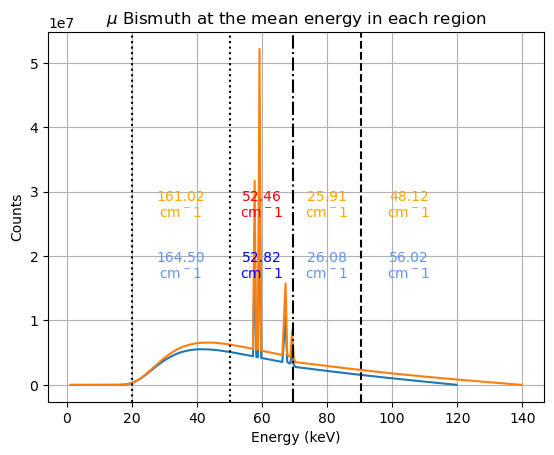

In [73]:
# Find the closes xx and xx2 values to the k-edge energies
k_bi_index = np.argmin(np.abs(xx - k_bi))
k_gd_index = np.argmin(np.abs(xx2 - k_gd))
k_W_index = np.argmin(np.abs(xx - 69.5))
k_20_index = np.argmin(np.abs(xx - 20))

k_20 = 20
k_W = 69.5
# Calculate the percent of the fluence between the k-edges 
fluence_to_gd_120 = np.sum(yy[k_20_index:k_gd_index]) / np.sum(yy)
fluence_to_gd_140 = np.sum(yy2[k_20_index:k_gd_index]) / np.sum(yy2)
fluence_gd_to_W_120 = np.sum(yy[k_gd_index:k_W_index]) / np.sum(yy)
fluence_gd_to_W_140 = np.sum(yy2[k_gd_index:k_W_index]) / np.sum(yy2)
fluence_W_to_bi_120 = np.sum(yy[k_W_index:k_bi_index]) / np.sum(yy)
fluence_W_to_bi_140 = np.sum(yy2[k_W_index:k_bi_index]) / np.sum(yy2)
fluence_bi_120 = np.sum(yy[k_bi_index:]) / np.sum(yy)
fluence_bi_140 = np.sum(yy2[k_bi_index:]) / np.sum(yy2)

# Find the mean energy in each num_regions
mean_energy_120 = np.mean(xx*(yy/np.sum(yy)))
mean_energy_140 = np.mean(xx2*(yy2/np.sum(yy2)))
print(k_20_index,k_gd_index)
# Calculate the mean energy in each num_regions as a weighted average of the energy time the fluence in each bin
mean_energy_to_gd_120 = np.sum(xx[k_20_index:k_gd_index]*(yy[k_20_index:k_gd_index]/np.sum(yy[k_20_index:k_gd_index])))
mean_energy_to_gd_140 = np.sum(xx2[k_20_index:k_gd_index]*(yy2[k_20_index:k_gd_index]/np.sum(yy2[k_20_index:k_gd_index])))
mean_energy_gd_to_W_120 = np.sum(xx[k_gd_index:k_W_index]*(yy[k_gd_index:k_W_index]/np.sum(yy[k_gd_index:k_W_index])))
mean_energy_gd_to_W_140 = np.sum(xx2[k_gd_index:k_W_index]*(yy2[k_gd_index:k_W_index]/np.sum(yy2[k_gd_index:k_W_index])))
mean_energy_W_to_bi_120 = np.sum(xx[k_W_index:k_bi_index]*(yy[k_W_index:k_bi_index]/np.sum(yy[k_W_index:k_bi_index])))
mean_energy_W_to_bi_140 = np.sum(xx2[k_W_index:k_bi_index]*(yy2[k_W_index:k_bi_index]/np.sum(yy2[k_W_index:k_bi_index])))
mean_energy_bi_120 = np.sum(xx[k_bi_index:]*(yy[k_bi_index:]/np.sum(yy[k_bi_index:])))
mean_energy_bi_140 = np.sum(xx2[k_bi_index:]*(yy2[k_bi_index:]/np.sum(yy2[k_bi_index:])))
                                
plt.figure()
plt.plot(xx, yy, label='120 kVp')
plt.plot(xx2, yy2, label='140 kVp')
# plot the k_bismuth and k_gadolinium lines
# plot the k_tungsten line as well
# Show the percent of the fluence between the k-edges
plt.axvline(k_20, color='k', linestyle=':', label=f'20 keV bin')
plt.axvline(k_gd, color='k', linestyle=':', label=f'Gd K-edge {k_gd} keV')
plt.axvline(k_bi, color='k', linestyle='--', label=f'Bi K-edge {k_bi} keV')
plt.axvline(69.5, color='k', linestyle='-.', label=f'W K-edge 69.5 keV')

# mu_at_mean_energy_120 = mu_bi(mean_energy_120)
# mu_at_mean_energy_140 = mu_bi(mean_energy_140)

mu_at_mean_energy_to_gd_120 = mu_bi(mean_energy_to_gd_120)
mu_at_mean_energy_to_gd_140 = mu_bi(mean_energy_to_gd_140)
mu_at_mean_energy_gd_to_W_120 = mu_bi(mean_energy_gd_to_W_120)
mu_at_mean_energy_gd_to_W_140 = mu_bi(mean_energy_gd_to_W_140)
mu_at_mean_energy_W_to_bi_120 = mu_bi(mean_energy_W_to_bi_120)
mu_at_mean_energy_W_to_bi_140 = mu_bi(mean_energy_W_to_bi_140)
mu_at_mean_energy_bi_120 = mu_bi(mean_energy_bi_120)
mu_at_mean_energy_bi_140 = mu_bi(mean_energy_bi_140)

# show the percent of the fluence between the k-edges in each num_regions
plt.text((k_gd+20)/2, 0.5*max(yy), f'{mu_at_mean_energy_to_gd_120:.2f}\ncm$^{-1}$',color='cornflowerblue',ha='center')
plt.text((k_gd+k_W)/2, 0.5*max(yy), f'{mu_at_mean_energy_gd_to_W_120:.2f}\ncm$^{-1}$',color='blue',ha='center')
plt.text((k_W+k_bi)/2, 0.5*max(yy), f'{mu_at_mean_energy_W_to_bi_120:.2f}\ncm$^{-1}$',color='cornflowerblue',ha='center')
plt.text((k_bi+max(xx))/2, 0.5*max(yy), f'{mu_at_mean_energy_bi_120:.2f}\ncm$^{-1}$',color='cornflowerblue',ha='center')

plt.text((k_gd+20)/2, 0.5*max(yy2), f'{mu_at_mean_energy_to_gd_140:.2f}\ncm$^{-1}$',color='orange',ha='center')
plt.text((k_gd+k_W)/2, 0.5*max(yy2), f'{mu_at_mean_energy_gd_to_W_140:.2f}\ncm$^{-1}$',color='red',ha='center')
plt.text((k_W+k_bi)/2, 0.5*max(yy2), f'{mu_at_mean_energy_W_to_bi_140:.2f}\ncm$^{-1}$',color='orange',ha='center')
plt.text((k_bi+max(xx))/2, 0.5*max(yy2), f'{mu_at_mean_energy_bi_140:.2f}\ncm$^{-1}$',color='orange',ha='center')

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.grid()
plt.title('$\mu$ Bismuth at the mean energy in each region')
# plt.legend()

# Save the plot
plt.savefig('spectra_bi_gd_mu_bi.png', dpi=300)

37 98


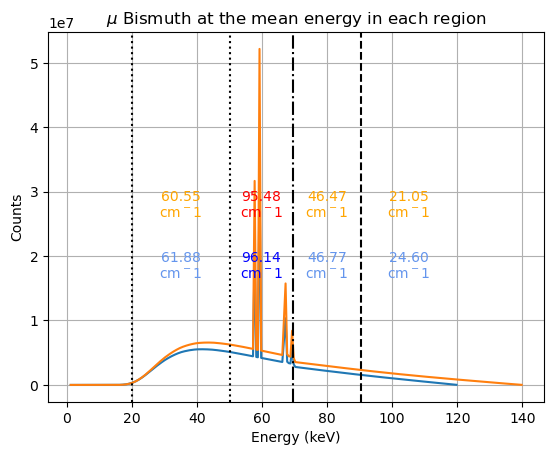

In [75]:
# Find the closes xx and xx2 values to the k-edge energies
k_bi_index = np.argmin(np.abs(xx - k_bi))
k_gd_index = np.argmin(np.abs(xx2 - k_gd))
k_W_index = np.argmin(np.abs(xx - 69.5))
k_20_index = np.argmin(np.abs(xx - 20))

k_20 = 20
k_W = 69.5
# Calculate the percent of the fluence between the k-edges 
fluence_to_gd_120 = np.sum(yy[k_20_index:k_gd_index]) / np.sum(yy)
fluence_to_gd_140 = np.sum(yy2[k_20_index:k_gd_index]) / np.sum(yy2)
fluence_gd_to_W_120 = np.sum(yy[k_gd_index:k_W_index]) / np.sum(yy)
fluence_gd_to_W_140 = np.sum(yy2[k_gd_index:k_W_index]) / np.sum(yy2)
fluence_W_to_bi_120 = np.sum(yy[k_W_index:k_bi_index]) / np.sum(yy)
fluence_W_to_bi_140 = np.sum(yy2[k_W_index:k_bi_index]) / np.sum(yy2)
fluence_bi_120 = np.sum(yy[k_bi_index:]) / np.sum(yy)
fluence_bi_140 = np.sum(yy2[k_bi_index:]) / np.sum(yy2)

# Find the mean energy in each num_regions
mean_energy_120 = np.mean(xx*(yy/np.sum(yy)))
mean_energy_140 = np.mean(xx2*(yy2/np.sum(yy2)))
print(k_20_index,k_gd_index)
# Calculate the mean energy in each num_regions as a weighted average of the energy time the fluence in each bin
mean_energy_to_gd_120 = np.sum(xx[k_20_index:k_gd_index]*(yy[k_20_index:k_gd_index]/np.sum(yy[k_20_index:k_gd_index])))
mean_energy_to_gd_140 = np.sum(xx2[k_20_index:k_gd_index]*(yy2[k_20_index:k_gd_index]/np.sum(yy2[k_20_index:k_gd_index])))
mean_energy_gd_to_W_120 = np.sum(xx[k_gd_index:k_W_index]*(yy[k_gd_index:k_W_index]/np.sum(yy[k_gd_index:k_W_index])))
mean_energy_gd_to_W_140 = np.sum(xx2[k_gd_index:k_W_index]*(yy2[k_gd_index:k_W_index]/np.sum(yy2[k_gd_index:k_W_index])))
mean_energy_W_to_bi_120 = np.sum(xx[k_W_index:k_bi_index]*(yy[k_W_index:k_bi_index]/np.sum(yy[k_W_index:k_bi_index])))
mean_energy_W_to_bi_140 = np.sum(xx2[k_W_index:k_bi_index]*(yy2[k_W_index:k_bi_index]/np.sum(yy2[k_W_index:k_bi_index])))
mean_energy_bi_120 = np.sum(xx[k_bi_index:]*(yy[k_bi_index:]/np.sum(yy[k_bi_index:])))
mean_energy_bi_140 = np.sum(xx2[k_bi_index:]*(yy2[k_bi_index:]/np.sum(yy2[k_bi_index:])))
                                
plt.figure()
plt.plot(xx, yy, label='120 kVp')
plt.plot(xx2, yy2, label='140 kVp')
# plot the k_bismuth and k_gadolinium lines
# plot the k_tungsten line as well
# Show the percent of the fluence between the k-edges
plt.axvline(k_20, color='k', linestyle=':', label=f'20 keV bin')
plt.axvline(k_gd, color='k', linestyle=':', label=f'Gd K-edge {k_gd} keV')
plt.axvline(k_bi, color='k', linestyle='--', label=f'Bi K-edge {k_bi} keV')
plt.axvline(69.5, color='k', linestyle='-.', label=f'W K-edge 69.5 keV')

# mu_at_mean_energy_120 = mu_bi(mean_energy_120)
# mu_at_mean_energy_140 = mu_bi(mean_energy_140)

mu_at_mean_energy_to_gd_120 = mu_gd(mean_energy_to_gd_120)
mu_at_mean_energy_to_gd_140 = mu_gd(mean_energy_to_gd_140)
mu_at_mean_energy_gd_to_W_120 = mu_gd(mean_energy_gd_to_W_120)
mu_at_mean_energy_gd_to_W_140 = mu_gd(mean_energy_gd_to_W_140)
mu_at_mean_energy_W_to_bi_120 = mu_gd(mean_energy_W_to_bi_120)
mu_at_mean_energy_W_to_bi_140 = mu_gd(mean_energy_W_to_bi_140)
mu_at_mean_energy_bi_120 = mu_gd(mean_energy_bi_120)
mu_at_mean_energy_bi_140 = mu_gd(mean_energy_bi_140)

# show the percent of the fluence between the k-edges in each num_regions
plt.text((k_gd+20)/2, 0.5*max(yy), f'{mu_at_mean_energy_to_gd_120:.2f}\ncm$^{-1}$',color='cornflowerblue',ha='center')
plt.text((k_gd+k_W)/2, 0.5*max(yy), f'{mu_at_mean_energy_gd_to_W_120:.2f}\ncm$^{-1}$',color='blue',ha='center')
plt.text((k_W+k_bi)/2, 0.5*max(yy), f'{mu_at_mean_energy_W_to_bi_120:.2f}\ncm$^{-1}$',color='cornflowerblue',ha='center')
plt.text((k_bi+max(xx))/2, 0.5*max(yy), f'{mu_at_mean_energy_bi_120:.2f}\ncm$^{-1}$',color='cornflowerblue',ha='center')

plt.text((k_gd+20)/2, 0.5*max(yy2), f'{mu_at_mean_energy_to_gd_140:.2f}\ncm$^{-1}$',color='orange',ha='center')
plt.text((k_gd+k_W)/2, 0.5*max(yy2), f'{mu_at_mean_energy_gd_to_W_140:.2f}\ncm$^{-1}$',color='red',ha='center')
plt.text((k_W+k_bi)/2, 0.5*max(yy2), f'{mu_at_mean_energy_W_to_bi_140:.2f}\ncm$^{-1}$',color='orange',ha='center')
plt.text((k_bi+max(xx))/2, 0.5*max(yy2), f'{mu_at_mean_energy_bi_140:.2f}\ncm$^{-1}$',color='orange',ha='center')

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.grid()
plt.title('$\mu$ Bismuth at the mean energy in each region')
# plt.legend()

# Save the plot
plt.savefig('spectra_bi_gd_mu_gd.png', dpi=300)

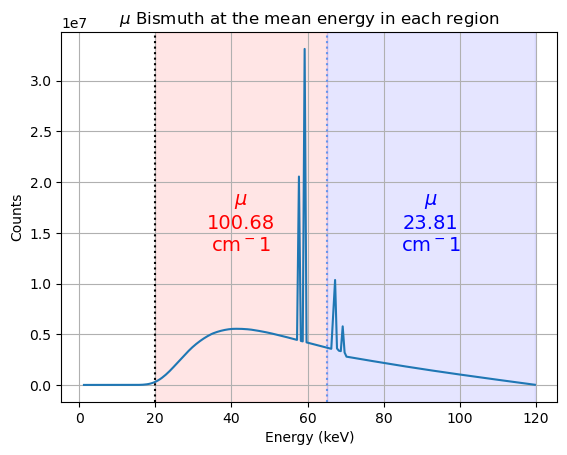

In [34]:
# Find the closes xx and xx2 values to the k-edge energies
k_bi_index = np.argmin(np.abs(xx - k_bi))
k_gd_index = np.argmin(np.abs(xx2 - k_gd))
k_W_index = np.argmin(np.abs(xx - 69.5))
k_20_index = np.argmin(np.abs(xx - 20))

k_70 = 70
k_65 = 65
k_70_index = np.argmin(np.abs(xx - k_70))
k_65_index = np.argmin(np.abs(xx2 - k_65))

# Calculate the percent of the fluence between the k-edges 
fluence_to_65_120 = np.sum(yy[k_20_index:k_65_index]) / np.sum(yy)
fluence_to_70_140 = np.sum(yy2[k_20_index:k_70_index]) / np.sum(yy2)
fluence_65_to_120 = np.sum(yy[k_65_index:]) / np.sum(yy)
fluence_70_to_140 = np.sum(yy2[k_70_index:]) / np.sum(yy2)


# Find the mean energy in each num_regions

# Calculate the mean energy in each num_regions as a weighted average of the energy time the fluence in each bin
mean_energy_to_65_120 = np.sum(xx[k_20_index:k_65_index]*(yy[k_20_index:k_65_index]/np.sum(yy[k_20_index:k_65_index])))
mean_energy_to_70_140 = np.sum(xx2[k_20_index:k_70_index]*(yy2[k_20_index:k_70_index]/np.sum(yy2[k_20_index:k_70_index])))
mean_energy_65_120 = np.sum(xx[k_65_index:]*(yy[k_65_index:]/np.sum(yy[k_65_index:])))
mean_energy_70_140 = np.sum(xx2[k_70_index:]*(yy2[k_70_index:]/np.sum(yy2[k_70_index:])))
                                
plt.figure()
plt.plot(xx, yy, label='120 kVp')
# plt.plot(xx2, yy2, label='140 kVp')
# plot the k_bismuth and k_gadolinium lines
# plot the k_tungsten line as well
# Show the percent of the fluence between the k-edges
plt.axvline(k_20, color='k', linestyle=':', label=f'20 keV bin')
plt.axvline(k_65, linestyle=':', label=f'65 keV bin',color='cornflowerblue')
# plt.axvline(k_70, linestyle=':', label=f'70 keV bin',color='orange')

# mu_at_mean_energy_120 = mu_bi(mean_energy_120)
# mu_at_mean_energy_140 = mu_bi(mean_energy_140)

mu_at_mean_energy_to_65_120 = mu_bi(mean_energy_to_65_120)
# mu_at_mean_energy_to_70_140 = mu_bi(mean_energy_to_70_140)
mu_at_mean_energy_65_120 = mu_bi(mean_energy_65_120)
# mu_at_mean_energy_70_140 = mu_bi(mean_energy_70_140)

# show the percent of the fluence between the k-edges in each num_regions
plt.text((k_65+20)/2, 0.4*max(yy), f'$\mu$\n{mu_at_mean_energy_to_65_120:.2f}\ncm$^{-1}$',color='r',ha='center',fontsize=14)
# plt.text((k_70+20)/2, 0.6*max(yy), f'{mu_at_mean_energy_to_70_140:.2f}\ncm$^{-1}$',color='orange',ha='center')
plt.text((k_65+max(xx))/2, 0.4*max(yy), f'$\mu$\n{mu_at_mean_energy_65_120:.2f}\ncm$^{-1}$',color='b',ha='center',fontsize=14)
# plt.text((k_70+max(xx))/2, 0.6*max(yy), f'{mu_at_mean_energy_70_140:.2f}\ncm$^{-1}$',color='orange',ha='center')
# show the mean energy in each of the regions 
# plt.text((k_65+20)/2, 0.6*max(yy), f'$E$\n{mean_energy_to_65_120:.2f}\nkeV',color='r',ha='center',fontsize=14)
# # plt.text((k_70+20)/2, 0.6*max(yy), f'{mean_energy_to_70_140:.2f}\nkeV',color='orange',ha='center')
# plt.text((k_65+max(xx))/2, 0.6*max(yy), f'$E$\n{mean_energy_65_120:.2f}\nkeV',color='b',ha='center',fontsize=14)

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.grid()
plt.title('$\mu$ Bismuth at the mean energy in each region')
# plt.legend()

plt.axvspan(k_20, k_65, color='r', alpha=0.1, label='low energy image')
plt.axvspan(k_65, max(xx), color='b', alpha=0.1, label='high energy image')

# Save the plot
plt.savefig('spectra_bi_gd_mu_bi_real_mu.png', dpi=300)

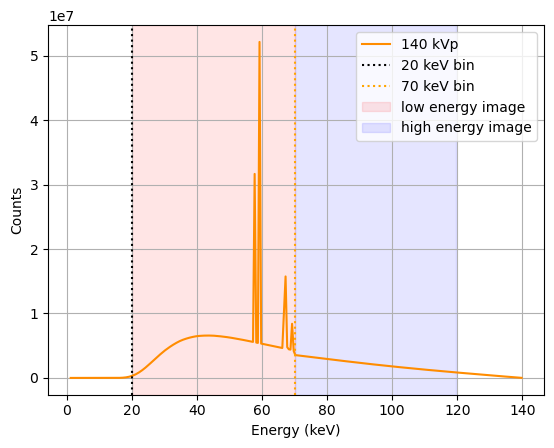

In [20]:
# Find the closes xx and xx2 values to the k-edge energies
k_bi_index = np.argmin(np.abs(xx - k_bi))
k_gd_index = np.argmin(np.abs(xx2 - k_gd))
k_W_index = np.argmin(np.abs(xx - 69.5))
k_20_index = np.argmin(np.abs(xx - 20))

k_20 =20
k_70 = 70
k_65 = 65
k_70_index = np.argmin(np.abs(xx - k_70))
k_65_index = np.argmin(np.abs(xx2 - k_65))

# Calculate the percent of the fluence between the k-edges 
fluence_to_65_120 = np.sum(yy[k_20_index:k_65_index]) / np.sum(yy)
fluence_to_70_140 = np.sum(yy2[k_20_index:k_70_index]) / np.sum(yy2)
fluence_65_to_120 = np.sum(yy[k_65_index:]) / np.sum(yy)
fluence_70_to_140 = np.sum(yy2[k_70_index:]) / np.sum(yy2)


# Find the mean energy in each num_regions

# Calculate the mean energy in each num_regions as a weighted average of the energy time the fluence in each bin
mean_energy_to_65_120 = np.sum(xx[k_20_index:k_65_index]*(yy[k_20_index:k_65_index]/np.sum(yy[k_20_index:k_65_index])))
mean_energy_to_70_140 = np.sum(xx2[k_20_index:k_70_index]*(yy2[k_20_index:k_70_index]/np.sum(yy2[k_20_index:k_70_index])))
mean_energy_65_120 = np.sum(xx[k_65_index:]*(yy[k_65_index:]/np.sum(yy[k_65_index:])))
mean_energy_70_140 = np.sum(xx2[k_70_index:]*(yy2[k_70_index:]/np.sum(yy2[k_70_index:])))
                                
plt.figure()
# plt.plot(xx, yy, label='120 kVp')
plt.plot(xx2, yy2, label='140 kVp', c = 'darkorange')

# plot the k_bismuth and k_gadolinium lines
# plot the k_tungsten line as well
# Show the percent of the fluence between the k-edges
plt.axvline(k_20, color='k', linestyle=':', label=f'20 keV bin')
# plt.axvline(k_65, linestyle=':', label=f'65 keV bin',color='cornflowerblue')
plt.axvline(k_70, linestyle=':', label=f'70 keV bin',color='orange')

# plot to regions between the k_20 and the k_65 and k_65 and the end of the spectrum
# plt.axvspan(k_20, k_65, color='r', alpha=0.1, label='low energy image')
# plt.axvspan(k_65, max(xx), color='b', alpha=0.1, label='high energy image')
# plot to regions between the k_20 and the k_70 and k_70 and the end of the spectrum
plt.axvspan(k_20, k_70, color='r', alpha=0.1, label='low energy image')
plt.axvspan(k_70, max(xx), color='b', alpha=0.1, label='high energy image')

# mu_at_mean_energy_120 = mu_bi(mean_energy_120)
# mu_at_mean_energy_140 = mu_bi(mean_energy_140)

mu_at_mean_energy_to_65_120 = mu_bi(mean_energy_to_65_120)
mu_at_mean_energy_to_70_140 = mu_bi(mean_energy_to_70_140)
mu_at_mean_energy_65_120 = mu_bi(mean_energy_65_120)
mu_at_mean_energy_70_140 = mu_bi(mean_energy_70_140)

# show the percent of the fluence between the k-edges in each num_regions
# plt.text((k_65+20)/2, 0.4*max(yy), f'{mu_at_mean_energy_to_65_120:.2f}\ncm$^{-1}$',color='cornflowerblue',ha='center')
# plt.text((k_70+20)/2, 0.6*max(yy), f'{mu_at_mean_energy_to_70_140:.2f}\ncm$^{-1}$',color='orange',ha='center')
# plt.text((k_65+max(xx))/2, 0.4*max(yy), f'{mu_at_mean_energy_65_120:.2f}\ncm$^{-1}$',color='cornflowerblue',ha='center')
# plt.text((k_70+max(xx))/2, 0.6*max(yy), f'{mu_at_mean_energy_70_140:.2f}\ncm$^{-1}$',color='orange',ha='center')


plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.grid()
plt.legend()
# plt.title('$\mu$ Bismuth at the mean energy in each region')
# plt.legend()

# Save the plot
plt.savefig('spectra_140_bins.png', dpi=300)

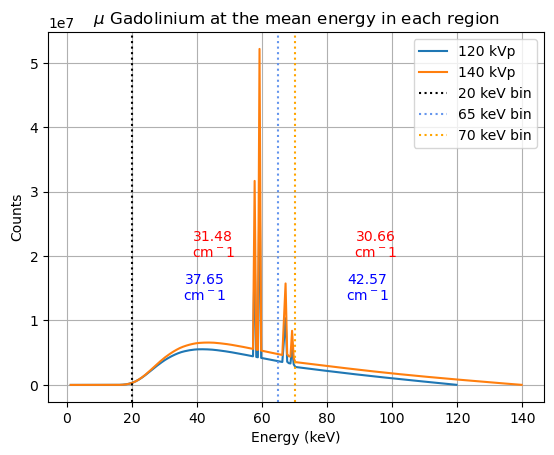

In [81]:
# Find the closes xx and xx2 values to the k-edge energies
k_bi_index = np.argmin(np.abs(xx - k_bi))
k_gd_index = np.argmin(np.abs(xx2 - k_gd))
k_W_index = np.argmin(np.abs(xx - 69.5))
k_20_index = np.argmin(np.abs(xx - 20))

k_70 = 70
k_65 = 65
k_70_index = np.argmin(np.abs(xx - k_70))
k_65_index = np.argmin(np.abs(xx2 - k_65))

# Calculate the percent of the fluence between the k-edges 
fluence_to_65_120 = np.sum(yy[k_20_index:k_65_index]) / np.sum(yy)
fluence_to_70_140 = np.sum(yy2[k_20_index:k_70_index]) / np.sum(yy2)
fluence_65_to_120 = np.sum(yy[k_65_index:]) / np.sum(yy)
fluence_70_to_140 = np.sum(yy2[k_70_index:]) / np.sum(yy2)


# Find the mean energy in each num_regions

# Calculate the mean energy in each num_regions as a weighted average of the energy time the fluence in each bin
mean_energy_to_65_120 = np.sum(xx[k_20_index:k_65_index]*(yy[k_20_index:k_65_index]/np.sum(yy[k_20_index:k_65_index])))
mean_energy_to_70_140 = np.sum(xx2[k_20_index:k_70_index]*(yy2[k_20_index:k_70_index]/np.sum(yy2[k_20_index:k_70_index])))
mean_energy_65_120 = np.sum(xx[k_65_index:]*(yy[k_65_index:]/np.sum(yy[k_65_index:])))
mean_energy_70_140 = np.sum(xx2[k_70_index:]*(yy2[k_70_index:]/np.sum(yy2[k_70_index:])))
                                
plt.figure()
plt.plot(xx, yy, label='120 kVp')
plt.plot(xx2, yy2, label='140 kVp')
# plot the k_bismuth and k_gadolinium lines
# plot the k_tungsten line as well
# Show the percent of the fluence between the k-edges
plt.axvline(k_20, color='k', linestyle=':', label=f'20 keV bin')
plt.axvline(k_65, linestyle=':', label=f'65 keV bin',color='cornflowerblue')
plt.axvline(k_70, linestyle=':', label=f'70 keV bin',color='orange')

# mu_at_mean_energy_120 = mu_bi(mean_energy_120)
# mu_at_mean_energy_140 = mu_bi(mean_energy_140)

mu_at_mean_energy_to_65_120 = mu_gd(mean_energy_to_65_120)
mu_at_mean_energy_to_70_140 = mu_gd(mean_energy_to_70_140)
mu_at_mean_energy_65_120 = mu_gd(mean_energy_65_120)
mu_at_mean_energy_70_140 = mu_gd(mean_energy_70_140)

# show the percent of the fluence between the k-edges in each num_regions
plt.text((k_65+20)/2, 0.4*max(yy), f'{mu_at_mean_energy_to_65_120:.2f}\ncm$^{-1}$',color='b',ha='center')
plt.text((k_70+20)/2, 0.6*max(yy), f'{mu_at_mean_energy_to_70_140:.2f}\ncm$^{-1}$',color='red',ha='center')
plt.text((k_65+max(xx))/2, 0.4*max(yy), f'{mu_at_mean_energy_65_120:.2f}\ncm$^{-1}$',color='b',ha='center')
plt.text((k_70+max(xx))/2, 0.6*max(yy), f'{mu_at_mean_energy_70_140:.2f}\ncm$^{-1}$',color='red',ha='center')


plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.grid()
plt.title('$\mu$ Gadolinium at the mean energy in each region')
plt.legend()

# Save the plot
plt.savefig('spectra_bi_gd_mu_gd_real.png', dpi=300)

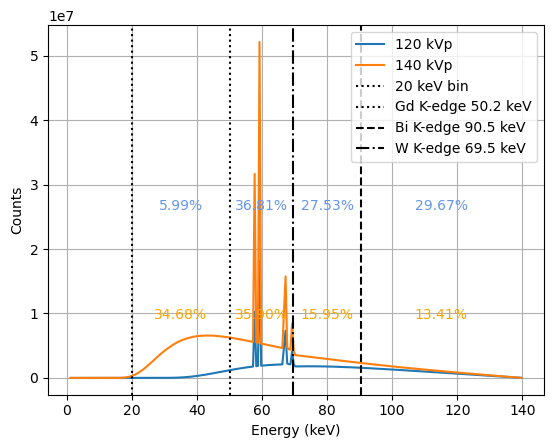

In [84]:
s = sp.Spek(140,14)
s.filter('Al',4)
s.filter('Ti',0.89)
s.filter('Cu',0.5)

xx, yy = s.get_spectrum()

# Find the closes xx and xx2 values to the k-edge energies
k_bi_index = np.argmin(np.abs(xx - k_bi))
k_gd_index = np.argmin(np.abs(xx2 - k_gd))
k_W_index = np.argmin(np.abs(xx - 69.5))
k_20_index = np.argmin(np.abs(xx - 20))

k_20 = 20
k_W = 69.5
# Calculate the percent of the fluence between the k-edges 
fluence_to_gd_120 = np.sum(yy[k_20_index:k_gd_index]) / np.sum(yy)
fluence_to_gd_140 = np.sum(yy2[k_20_index:k_gd_index]) / np.sum(yy2)
fluence_gd_to_W_120 = np.sum(yy[k_gd_index:k_W_index]) / np.sum(yy)
fluence_gd_to_W_140 = np.sum(yy2[k_gd_index:k_W_index]) / np.sum(yy2)
fluence_W_to_bi_120 = np.sum(yy[k_W_index:k_bi_index]) / np.sum(yy)
fluence_W_to_bi_140 = np.sum(yy2[k_W_index:k_bi_index]) / np.sum(yy2)
fluence_bi_120 = np.sum(yy[k_bi_index:]) / np.sum(yy)
fluence_bi_140 = np.sum(yy2[k_bi_index:]) / np.sum(yy2)

plt.figure()
plt.plot(xx, yy, label='120 kVp')
plt.plot(xx2, yy2, label='140 kVp')
# plot the k_bismuth and k_gadolinium lines
# plot the k_tungsten line as well
# Show the percent of the fluence between the k-edges
plt.axvline(k_20, color='k', linestyle=':', label=f'20 keV bin')
plt.axvline(k_gd, color='k', linestyle=':', label=f'Gd K-edge {k_gd} keV')
plt.axvline(k_bi, color='k', linestyle='--', label=f'Bi K-edge {k_bi} keV')
plt.axvline(69.5, color='k', linestyle='-.', label=f'W K-edge 69.5 keV')

# show the percent of the fluence between the k-edges in each num_regions
plt.text((k_gd+20)/2, 0.5*max(yy2), f'{fluence_to_gd_120:.2%}',color='cornflowerblue',ha='center')
plt.text((k_gd+k_W)/2, 0.5*max(yy2), f'{fluence_gd_to_W_120:.2%}',color='cornflowerblue',ha='center')
plt.text((k_W+k_bi)/2, 0.5*max(yy2), f'{fluence_W_to_bi_120:.2%}',color='cornflowerblue',ha='center')
plt.text((k_bi+max(xx))/2, 0.5*max(yy2), f'{fluence_bi_120:.2%}',color='cornflowerblue',ha='center')

plt.text((k_gd+20)/2, 0.5*max(yy), f'{fluence_to_gd_140:.2%}',color='orange',ha='center')
plt.text((k_gd+k_W)/2, 0.5*max(yy), f'{fluence_gd_to_W_140:.2%}',color='orange',ha='center')
plt.text((k_W+k_bi)/2, 0.5*max(yy), f'{fluence_W_to_bi_140:.2%}',color='orange',ha='center')
plt.text((k_bi+max(xx))/2, 0.5*max(yy), f'{fluence_bi_140:.2%}',color='orange',ha='center')

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.grid()
plt.legend()

# Save the plot
plt.savefig('spectra_bi_gd_hard_spec.png', dpi=300)

Text(0, 0.5, 'Fluence')

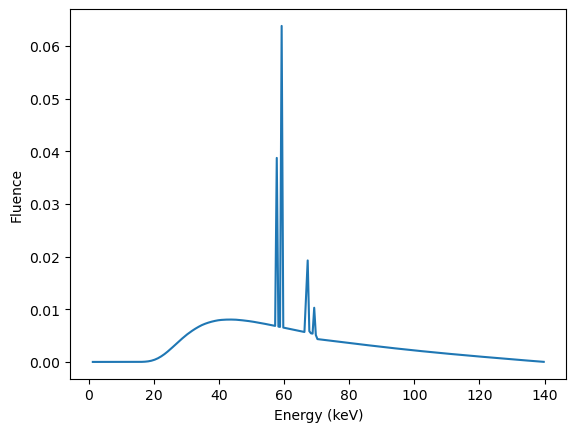

In [6]:
s = sp.Spek(140,14)
s.filter('Al',4)

plt.figure()
plt.plot(s.get_spectrum()[0],s.get_spectrum()[1]/np.sum(s.get_spectrum()[1]),label='140 kVp')
plt.xlabel('Energy (keV)')
plt.ylabel('Fluence')


In [5]:
import spekpy as sp
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import fastcat as fc

phantom = fc.Catphan_404_Devon()

[2024-02-06 16:00:47,051] {colorbar.py:859} DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f5deef77dd0>


(-0.5, 511.5, 511.5, -0.5)

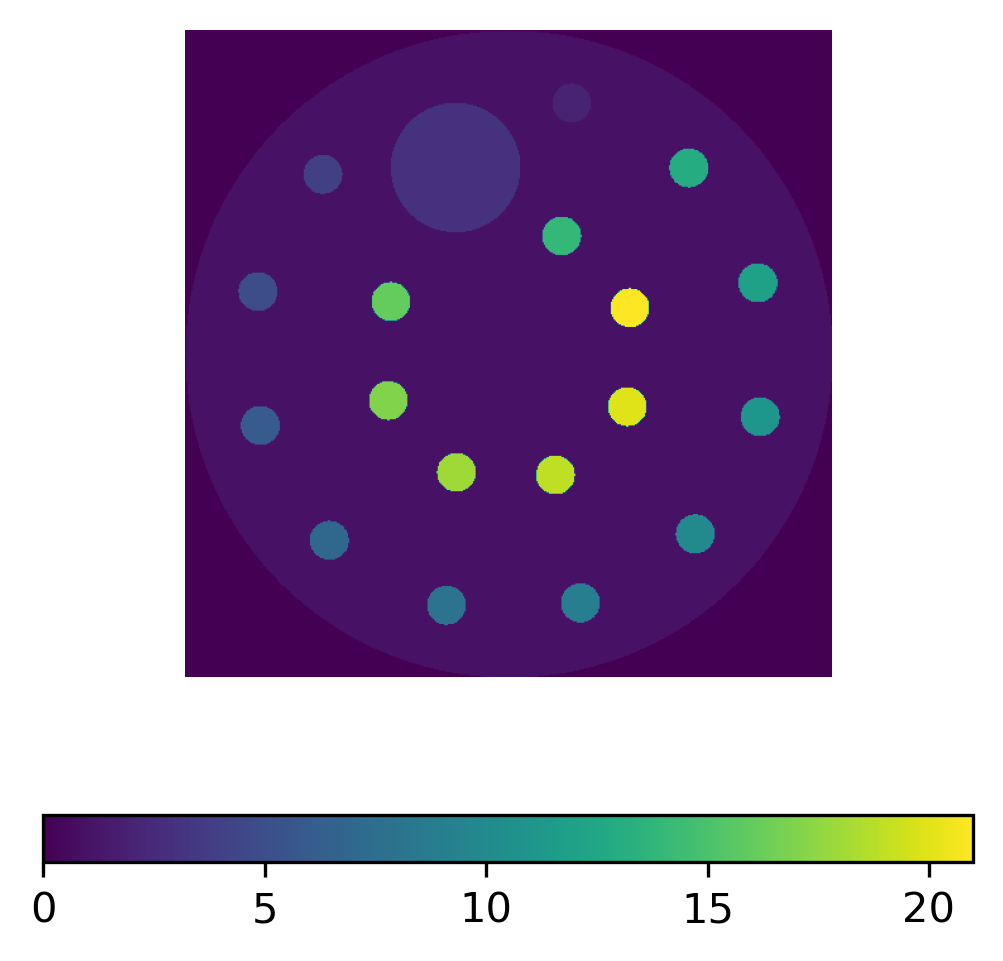

In [12]:
plt.figure(figsize=[    4,  4], dpi=300)
plt.imshow(phantom.phantom[5])
plt.colorbar(orientation='horizontal')
plt.axis('off')